# I. Perkenalan
> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 FTDS Batch 008.

Graded Challenge 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

1. Mampu memahami konsep Classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# II. Import Libraries
> Cell pertama pada notebook akan diisi semua library yang digunakan dalam project, antara lain **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **missingno** dan **Scikit-Learn**.

In [73]:
# Import Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report

# III. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset **weatherAUS** berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia.

RainTomorrow adalah variabel target untuk diprediksi. Artinya -- apakah hari berikutnya hujan, Ya atau Tidak? Kolom ini adalah Ya jika hujan untuk hari itu adalah 1mm atau lebih. 

In [74]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## III.I. Data Characteristics

In [75]:
df.shape

(145460, 23)

Dataframe ini terbentuk dari:
- **145460** baris
- **23** kolom

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari basic info ini dapat diketahui dataframe ini terdiri dari:
- 16 kolom dengan tipe float
- 7 kolom dengan tipe object

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Kebanyakan dari kolom pada dataframe memiliki distribusi yang normal, contohnya pada kolom `MinTemp` mean dan median kolom ini berdekatan.

## III.II. Data Cleaning

Pada proses data cleaning, dataset akan diperiksa apabila memiliki missing values.

In [78]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

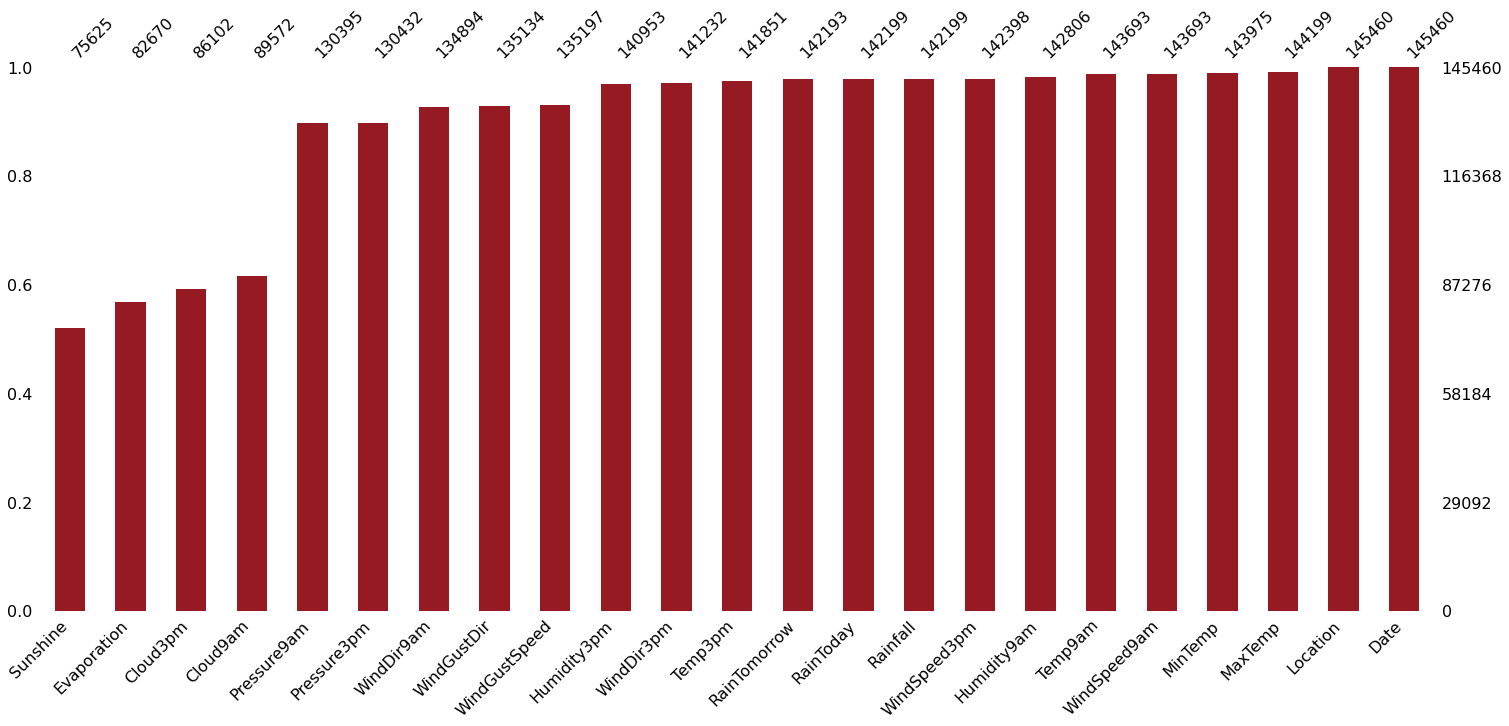

In [79]:
msno.bar(df, sort = 'ascending', color=(0.59, 0.1, 0.13))

Dapat diketahui terdapat **missing value** pada semua kolom kecuali kolom `Date` & `Location`.

Berikut merupakan skewness yang terdeteksi pada kolom-kolom yang memiliki missing values :

In [80]:
print(f'Skewness MinTemp: {df.MinTemp.skew()}')
print(f'Skewness MaxTemp: {df.MaxTemp.skew()}')
print(f'Skewness Rainfall: {df.Rainfall.skew()}')
print(f'Skewness Evaporation: {df.Evaporation.skew()}')
print(f'Skewness Sunshine: {df.Sunshine.skew()}')
print(f'Skewness WindGustSpeed: {df.WindGustSpeed.skew()}')
print(f'Skewness WindSpeed9am: {df.WindSpeed9am.skew()}')
print(f'Skewness WindSpeed3pm: {df.WindSpeed3pm.skew()}')
print(f'Skewness Humidity9am: {df.Humidity9am.skew()}')
print(f'Skewness Humidity3pm: {df.Humidity3pm.skew()}')
print(f'Skewness Pressure9am: {df.Pressure9am.skew()}')
print(f'Skewness Pressure3pm: {df.Pressure3pm.skew()}')
print(f'Skewness Cloud9am: {df.Cloud9am.skew()}')
print(f'Skewness Cloud3pm: {df.Cloud3pm.skew()}')
print(f'Skewness Temp9am: {df.Temp9am.skew()}')
print(f'Skewness Temp3pm: {df.Temp3pm.skew()}')

Skewness MinTemp: 0.021188284011150468
Skewness MaxTemp: 0.22083934813407782
Skewness Rainfall: 9.83622525039533
Skewness Evaporation: 3.7612860111420643
Skewness Sunshine: -0.4964800381328167
Skewness WindGustSpeed: 0.8748788780303394
Skewness WindSpeed9am: 0.7776295122810298
Skewness WindSpeed3pm: 0.6282154194116664
Skewness Humidity9am: -0.48396899459793047
Skewness Humidity3pm: 0.03361436764166918
Skewness Pressure9am: -0.09552363669451734
Skewness Pressure3pm: -0.04562140480119886
Skewness Cloud9am: -0.229081832248417
Skewness Cloud3pm: -0.22638434607149094
Skewness Temp9am: 0.08853999659506906
Skewness Temp3pm: 0.2379603639909972


## III.III. Duplicated Data

In [81]:
df.duplicated().any()

False

Diketahui bahwa dataframe tidak memiliki duplicated rows.

# IV. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Agar `RainTomorrow` dapat diperiksa dalam heatmap, kolom ini akan diubah menjadi `RainTomorrow` dengan tipe integer.

In [82]:
df["RainTomorrow"].replace({"Yes": 1, "No": 0}, inplace=True)

Berikut merupakan korelasi data pada kolom yang tergolong numerik:

<AxesSubplot:>

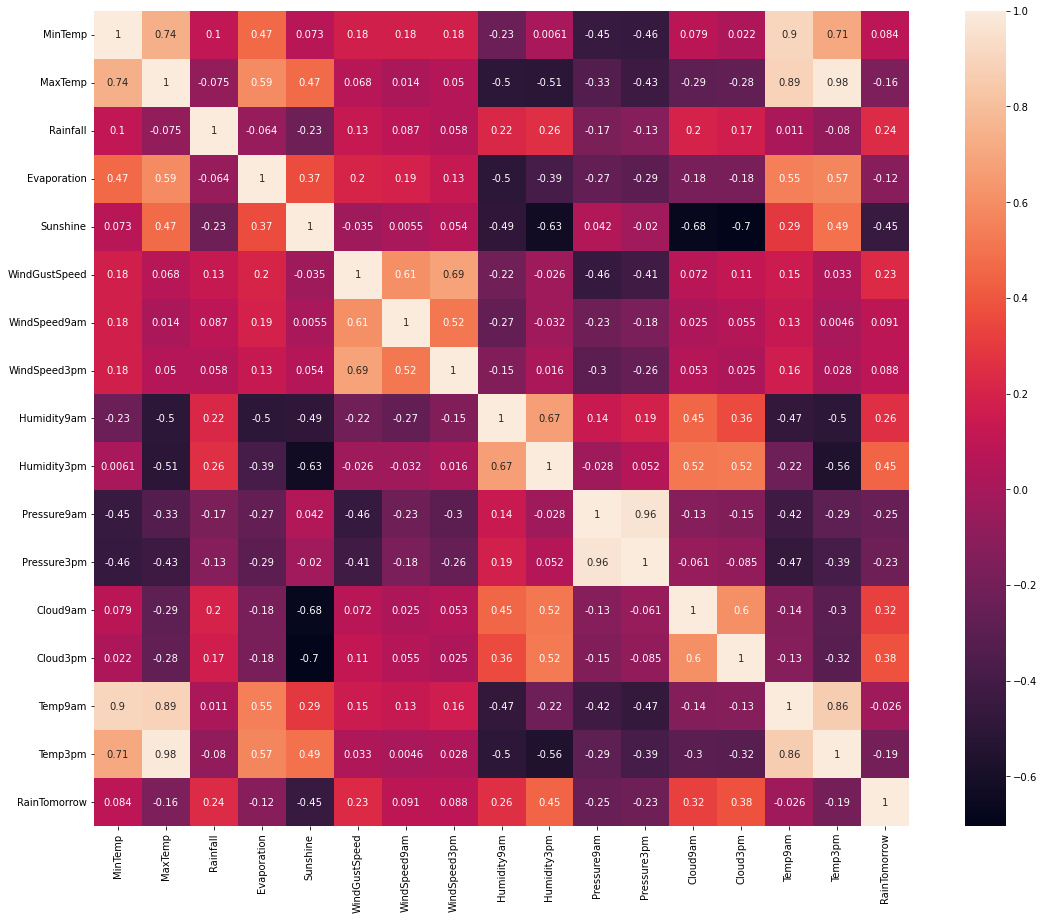

In [83]:
# Korelasi Data Numerik

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), square=True, annot=True)

Dikarenakan `Sunshine` memiliki korelasi -0.45, dan `Humidity3pm`, `Cloud9am`, dan `Cloud3pm` memiliki korelasi  > 0.3 dengan target, maka kolom tersebut akan digunakan dalam Feature Selection dan akan diekplorasikan lebih lanjut.

In [84]:
# Korelasi Data Katagorikal

cat_corr = pd.get_dummies(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

Diketahui pada korelasi kolom katagorikal, bahwa `RainToday` memiliki korelasi terbesar dengan `RainTomorrow`, maka kolom tersebut akan digunakan dalam Feature Selection dan akan diekplorasikan lebih lanjut.

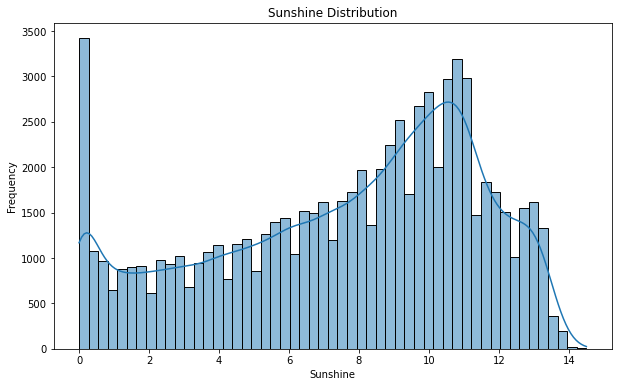

In [85]:
# Sunshine

plt.figure(figsize=(10, 6))
sns.histplot(x='Sunshine', data=df, kde=True)
plt.title('Sunshine Distribution')
plt.xlabel('Sunshine')
plt.ylabel('Frequency')
plt.show()

Diketahui dari histogram pada kolom sunshine, bahwa value 0/kosong lebih sering muncul pada kolom tersebut.

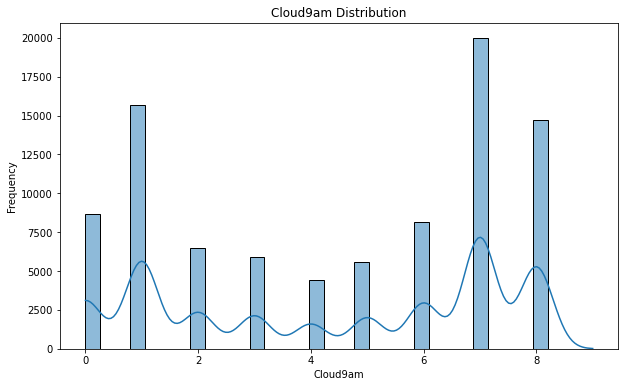

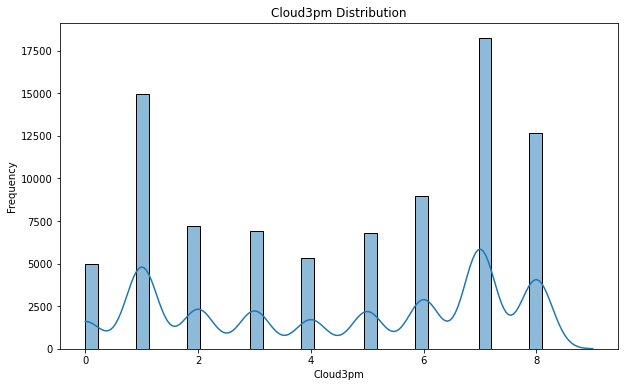

In [86]:
# Cloud

plt.figure(figsize=(10, 6))
sns.histplot(x='Cloud9am', data=df, kde=True)
plt.title('Cloud9am Distribution')
plt.xlabel('Cloud9am')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x= 'Cloud3pm', data=df, kde=True)
plt.title('Cloud3pm Distribution')
plt.xlabel('Cloud3pm')
plt.ylabel('Frequency')
plt.show()

Diketahui dari histogram pada kolom `Cloud9am` dan `Cloud3pm` memiliki struktur yang cukup mirip, dan juga bahwa value 7 lebih sering muncul pada kedua kolom tersebut.

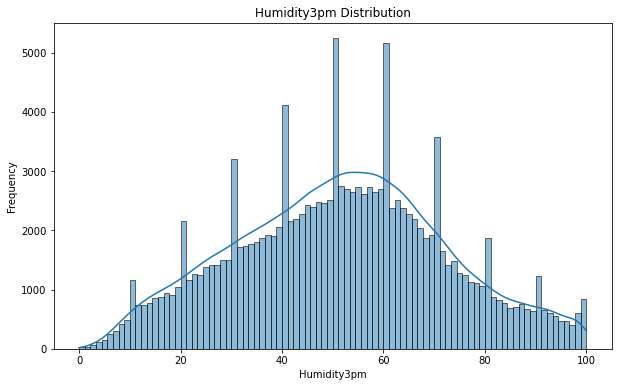

In [87]:
# Humidity3pm

plt.figure(figsize=(10, 6))

sns.histplot(x='Humidity3pm', data=df, kde=True)
plt.title('Humidity3pm Distribution')
plt.xlabel('Humidity3pm')
plt.ylabel('Frequency')
plt.show()

Diketahui kolom `Humidity3pm` memiliki distribusi normal.

In [88]:
# RainToday

df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

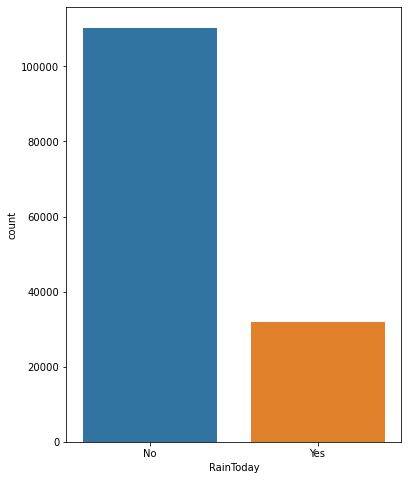

In [89]:
plt.subplots(figsize=(6, 8))
sns.countplot(x="RainToday", data=df)
plt.show()

Diketahui dari kolom `RainToday` lebih sering menyatakan hari tersebut tidak hujan.

In [90]:
# RainTomorrow

df['RainTomorrow'].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

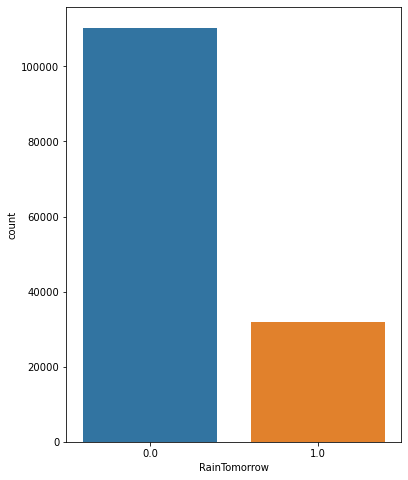

In [91]:
plt.subplots(figsize=(6, 8))
sns.countplot(x="RainTomorrow", data=df)
plt.show()

Karena value 0 = No/Tidak Hujan & 1 = Yes/Hujan, dinyatakan mayoritas hari esok tidak hujan.

# V. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## V.I. Get Data Inference

Mengambil 10 sampel pada dataframe untuk melakukan inference.

In [92]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=17)
df_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
23730,5/24/2016,NorfolkIsland,15.9,21.9,0.6,4.6,NaN,W,54.0,W,...,61.0,75.0,1013.6,1010.4,NaN,8.0,20.9,20.3,No,1.0
107991,11/24/2015,Woomera,14.2,34.4,0.0,9.4,NaN,NNW,37.0,ESE,...,38.0,9.0,1017.9,1013.3,0.0,0.0,21.8,32.3,No,0.0
96350,7/31/2008,Adelaide,7.6,19.3,0.8,1.8,5.0,W,69.0,NNE,...,56.0,52.0,1006.8,1005.2,NaN,NaN,14.4,18.1,No,1.0
86816,6/7/2016,Brisbane,10.4,22.4,0.0,3.2,9.8,W,35.0,WNW,...,50.0,33.0,1012.5,1008.7,0.0,1.0,17.3,22.0,No,0.0
80664,7/27/2016,Watsonia,7.1,12.1,0.6,2.0,1.9,W,41.0,WSW,...,100.0,55.0,1012.7,1017.4,7.0,6.0,9.3,11.7,No,0.0
68454,1/6/2012,Melbourne,13.8,24.4,0.0,6.6,10.8,SSW,43.0,SE,...,50.0,41.0,1018.9,1014.6,3.0,2.0,17.7,23.7,No,0.0
114935,11/12/2009,PearceRAAF,19.7,30.7,1.4,NaN,3.6,ESE,44.0,S,...,79.0,47.0,1013.8,1008.0,8.0,5.0,21.8,29.5,Yes,1.0
46153,5/20/2009,Canberra,7.2,16.1,0.0,2.0,2.6,E,35.0,SSE,...,74.0,56.0,1025.1,1023.2,7.0,7.0,11.8,15.2,No,0.0
91766,5/4/2013,GoldCoast,14.3,27.9,0.0,NaN,NaN,NW,37.0,NW,...,61.0,33.0,1020.9,1015.6,NaN,NaN,20.2,27.8,No,0.0
108210,6/30/2016,Woomera,6.7,18.3,0.0,4.4,NaN,WSW,50.0,WNW,...,69.0,37.0,1019.5,1018.0,0.0,NaN,11.0,18.1,No,0.0


In [93]:
# Remove Inference-Set from Dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0


In [94]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Display data_inf
df_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/24/2016,NorfolkIsland,15.9,21.9,0.6,4.6,NaN,W,54.0,W,...,61.0,75.0,1013.6,1010.4,NaN,8.0,20.9,20.3,No,1.0
1,11/24/2015,Woomera,14.2,34.4,0.0,9.4,NaN,NNW,37.0,ESE,...,38.0,9.0,1017.9,1013.3,0.0,0.0,21.8,32.3,No,0.0
2,7/31/2008,Adelaide,7.6,19.3,0.8,1.8,5.0,W,69.0,NNE,...,56.0,52.0,1006.8,1005.2,NaN,NaN,14.4,18.1,No,1.0
3,6/7/2016,Brisbane,10.4,22.4,0.0,3.2,9.8,W,35.0,WNW,...,50.0,33.0,1012.5,1008.7,0.0,1.0,17.3,22.0,No,0.0
4,7/27/2016,Watsonia,7.1,12.1,0.6,2.0,1.9,W,41.0,WSW,...,100.0,55.0,1012.7,1017.4,7.0,6.0,9.3,11.7,No,0.0
5,1/6/2012,Melbourne,13.8,24.4,0.0,6.6,10.8,SSW,43.0,SE,...,50.0,41.0,1018.9,1014.6,3.0,2.0,17.7,23.7,No,0.0
6,11/12/2009,PearceRAAF,19.7,30.7,1.4,NaN,3.6,ESE,44.0,S,...,79.0,47.0,1013.8,1008.0,8.0,5.0,21.8,29.5,Yes,1.0
7,5/20/2009,Canberra,7.2,16.1,0.0,2.0,2.6,E,35.0,SSE,...,74.0,56.0,1025.1,1023.2,7.0,7.0,11.8,15.2,No,0.0
8,5/4/2013,GoldCoast,14.3,27.9,0.0,NaN,NaN,NW,37.0,NW,...,61.0,33.0,1020.9,1015.6,NaN,NaN,20.2,27.8,No,0.0
9,6/30/2016,Woomera,6.7,18.3,0.0,4.4,NaN,WSW,50.0,WNW,...,69.0,37.0,1019.5,1018.0,0.0,NaN,11.0,18.1,No,0.0


## V.II. Split Dataset

Membuat training set dan test set dengan perbandingan **8:2**, dimana:
- **80%** data menjadi **training set**
- **20%** data menjadi **test set**

In [95]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=17)

In [96]:
df_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
144372,7/4/2014,Uluru,-0.4,21.7,0.0,NaN,NaN,ESE,28.0,S,...,47.0,18.0,1023.8,1020.7,NaN,NaN,7.3,21.4,No,0.0
45526,4/26/2017,Wollongong,15.8,24.0,0.2,NaN,NaN,W,72.0,SSE,...,54.0,52.0,1006.0,1003.6,NaN,8.0,19.8,16.4,No,0.0
110880,6/26/2015,Albany,8.5,16.8,2.6,2.2,3.2,NaN,NaN,SSW,...,82.0,59.0,1029.4,1029.2,5.0,7.0,12.5,15.8,Yes,0.0
22505,11/17/2012,NorfolkIsland,17.5,23.3,0.0,4.4,11.6,NaN,NaN,NW,...,73.0,68.0,1016.8,1014.4,4.0,1.0,21.2,22.4,No,0.0
18150,2/5/2009,NorahHead,20.6,28.7,2.0,NaN,NaN,NE,52.0,NE,...,85.0,74.0,1009.2,1006.4,NaN,NaN,24.1,25.8,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25631,4/12/2013,Penrith,13.9,26.3,0.2,NaN,NaN,NE,20.0,NaN,...,89.0,48.0,NaN,NaN,NaN,NaN,18.3,25.7,No,0.0
125680,5/1/2014,SalmonGums,3.9,18.9,0.0,NaN,NaN,SW,48.0,SW,...,79.0,80.0,NaN,NaN,NaN,NaN,13.0,12.9,No,0.0
42297,10/19/2016,Williamtown,10.2,24.0,0.0,7.4,NaN,SE,35.0,WNW,...,56.0,47.0,1017.9,1016.6,4.0,NaN,18.1,21.1,No,0.0
34959,3/9/2013,SydneyAirport,21.3,29.2,0.0,6.8,6.6,NE,48.0,NNW,...,63.0,45.0,1021.3,1018.9,5.0,3.0,24.8,27.4,No,0.0


In [97]:
df_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
23730,5/24/2016,NorfolkIsland,15.9,21.9,0.6,4.6,NaN,W,54.0,W,...,61.0,75.0,1013.6,1010.4,NaN,8.0,20.9,20.3,No,1.0
107991,11/24/2015,Woomera,14.2,34.4,0.0,9.4,NaN,NNW,37.0,ESE,...,38.0,9.0,1017.9,1013.3,0.0,0.0,21.8,32.3,No,0.0
96350,7/31/2008,Adelaide,7.6,19.3,0.8,1.8,5.0,W,69.0,NNE,...,56.0,52.0,1006.8,1005.2,NaN,NaN,14.4,18.1,No,1.0
86816,6/7/2016,Brisbane,10.4,22.4,0.0,3.2,9.8,W,35.0,WNW,...,50.0,33.0,1012.5,1008.7,0.0,1.0,17.3,22.0,No,0.0
80664,7/27/2016,Watsonia,7.1,12.1,0.6,2.0,1.9,W,41.0,WSW,...,100.0,55.0,1012.7,1017.4,7.0,6.0,9.3,11.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39095,4/9/2016,WaggaWagga,4.2,24.0,0.0,2.8,10.8,WSW,28.0,ESE,...,57.0,23.0,1023.3,1019.7,1.0,6.0,14.1,23.2,No,0.0
9699,10/4/2010,CoffsHarbour,16.2,19.5,128.0,0.2,0.0,SE,61.0,ESE,...,93.0,92.0,1021.2,1018.1,8.0,8.0,18.2,18.9,Yes,1.0
65266,1/11/2012,MelbourneAirport,11.2,19.0,0.8,6.0,9.8,WSW,74.0,WSW,...,66.0,35.0,1007.7,1013.1,6.0,6.0,13.7,15.7,No,0.0
31235,12/26/2010,Sydney,20.8,31.3,0.8,8.0,3.5,SSE,76.0,W,...,88.0,56.0,1006.3,1001.4,NaN,NaN,21.1,28.7,No,1.0


### V.III. Handling Missing Values

In [98]:
df_train.isna().sum()

Date                 0
Location             0
MinTemp           1194
MaxTemp           1013
Rainfall          2643
Evaporation      50134
Sunshine         55824
WindGustDir       8225
WindGustSpeed     8176
WindDir9am        8476
WindDir3pm        3366
WindSpeed9am      1428
WindSpeed3pm      2435
Humidity9am       2124
Humidity3pm       3578
Pressure9am      12045
Pressure3pm      12017
Cloud9am         44700
Cloud3pm         47487
Temp9am           1418
Temp3pm           2856
RainToday         2643
RainTomorrow      2623
dtype: int64

Diketahui semua kolom melainkan `Date` dan `Location` memiliki missing values. Karena sebelumnya sudah ditemukan skewness pada kolom-kolom yang memiliki missing value, maka kolom-kolom tersebut akan di-fill dengan mean, median dan modus, kecuali untuk target atau kolom `RainTomorrow` yang akan di-drop.

In [99]:
df_train['MinTemp'] = df_train['MinTemp'].fillna(df_train['MinTemp'].mean())
df_train['MaxTemp'] = df_train['MaxTemp'].fillna(df_train['MaxTemp'].mean())
df_train['Rainfall'] = df_train['Rainfall'].fillna(df_train['Rainfall'].median())
df_train['Evaporation'] = df_train['Evaporation'].fillna(df_train['Evaporation'].median())
df_train['Sunshine'] = df_train['Sunshine'].fillna(df_train['Sunshine'].mean())
df_train['WindGustDir'] = df_train['WindGustDir'].fillna(df_train['WindGustDir'].mode()[0])
df_train['WindGustSpeed'] = df_train['WindGustSpeed'].fillna(df_train['WindGustSpeed'].median())
df_train['WindDir9am'] = df_train['WindDir9am'].fillna(df_train['WindDir9am'].mode()[0])
df_train['WindDir3pm'] = df_train['WindDir3pm'].fillna(df_train['WindDir3pm'].mode()[0])
df_train['WindSpeed9am'] = df_train['WindSpeed9am'].fillna(df_train['WindSpeed9am'].median())
df_train['WindSpeed3pm'] = df_train['WindSpeed3pm'].fillna(df_train['WindSpeed3pm'].median())
df_train['Humidity9am'] = df_train['Humidity9am'].fillna(df_train['Humidity9am'].mean())
df_train['Humidity3pm'] = df_train['Humidity3pm'].fillna(df_train['Humidity3pm'].mean())
df_train['Pressure9am'] = df_train['Pressure9am'].fillna(df_train['Pressure9am'].mean())
df_train['Pressure3pm'] = df_train['Pressure3pm'].fillna(df_train['Pressure3pm'].mean())
df_train['Cloud9am'] = df_train['Cloud9am'].fillna(df_train['Cloud9am'].mean())
df_train['Cloud3pm'] = df_train['Cloud3pm'].fillna(df_train['Cloud3pm'].mean())
df_train['Temp9am'] = df_train['Temp9am'].fillna(df_train['Temp9am'].mean())
df_train['Temp3pm'] = df_train['Temp3pm'].fillna(df_train['Temp3pm'].mean())
df_train['RainToday'] = df_train['RainToday'].fillna(df_train['RainToday'].mode()[0])
df_train.dropna(subset = ["RainTomorrow"], inplace=True)

df_train.isna().sum()

C:\Users\pasca\AppData\Local\Temp/ipykernel_16680/764429496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MinTemp'] = df_train['MinTemp'].fillna(df_train['MinTemp'].mean())
C:\Users\pasca\AppData\Local\Temp/ipykernel_16680/764429496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MaxTemp'] = df_train['MaxTemp'].fillna(df_train['MaxTemp'].mean())
C:\Users\pasca\AppData\Local\Temp/ipykernel_16680/764429496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [100]:
df_train.shape

(113745, 23)

Setelah dilakukan penghapusan baris dengan missing value, sekarang `df_train` memiliki **113745 baris**.

Hal yang sama dilakukan pada `df_test` dengan mengisi missing value dengan mean, median dan modus, sekaligus drop kolom target.

In [101]:
df_test.isna().sum()

Date                 0
Location             0
MinTemp            291
MaxTemp            248
Rainfall           618
Evaporation      12656
Sunshine         14011
WindGustDir       2101
WindGustSpeed     2087
WindDir9am        2090
WindDir3pm         862
WindSpeed9am       339
WindSpeed3pm       627
Humidity9am        530
Humidity3pm        929
Pressure9am       3020
Pressure3pm       3011
Cloud9am         11188
Cloud3pm         11871
Temp9am            349
Temp3pm            753
RainToday          618
RainTomorrow       644
dtype: int64

In [102]:
df_test['MinTemp'] = df_test['MinTemp'].fillna(df_train['MinTemp'].mean())
df_test['MaxTemp'] = df_test['MaxTemp'].fillna(df_train['MaxTemp'].mean())
df_test['Rainfall'] = df_test['Rainfall'].fillna(df_train['Rainfall'].median())
df_test['Evaporation'] = df_test['Evaporation'].fillna(df_train['Evaporation'].median())
df_test['Sunshine'] = df_test['Sunshine'].fillna(df_train['Sunshine'].mean())
df_test['WindGustDir'] = df_test['WindGustDir'].fillna(df_train['WindGustDir'].mode()[0])
df_test['WindGustSpeed'] = df_test['WindGustSpeed'].fillna(df_train['WindGustSpeed'].median())
df_test['WindDir9am'] = df_test['WindDir9am'].fillna(df_train['WindDir9am'].mode()[0])
df_test['WindDir3pm'] = df_test['WindDir3pm'].fillna(df_train['WindDir3pm'].mode()[0])
df_test['WindSpeed9am'] = df_test['WindSpeed9am'].fillna(df_train['WindSpeed9am'].median())
df_test['WindSpeed3pm'] = df_test['WindSpeed3pm'].fillna(df_train['WindSpeed3pm'].median())
df_test['Humidity9am'] = df_test['Humidity9am'].fillna(df_train['Humidity9am'].mean())
df_test['Humidity3pm'] = df_test['Humidity3pm'].fillna(df_train['Humidity3pm'].mean())
df_test['Pressure9am'] = df_test['Pressure9am'].fillna(df_train['Pressure9am'].mean())
df_test['Pressure3pm'] = df_test['Pressure3pm'].fillna(df_train['Pressure3pm'].mean())
df_test['Cloud9am'] = df_test['Cloud9am'].fillna(df_train['Cloud9am'].mean())
df_test['Cloud3pm'] = df_test['Cloud3pm'].fillna(df_train['Cloud3pm'].mean())
df_test['Temp9am'] = df_test['Temp9am'].fillna(df_train['Temp9am'].mean())
df_test['Temp3pm'] = df_test['Temp3pm'].fillna(df_train['Temp3pm'].mean())
df_test['RainToday'] = df_test['RainToday'].fillna(df_train['RainToday'].mode()[0])
df_test.dropna(subset = ["RainTomorrow"], inplace=True)

df_test.isna().sum()


C:\Users\pasca\AppData\Local\Temp/ipykernel_16680/3913297088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MinTemp'] = df_test['MinTemp'].fillna(df_train['MinTemp'].mean())
C:\Users\pasca\AppData\Local\Temp/ipykernel_16680/3913297088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MaxTemp'] = df_test['MaxTemp'].fillna(df_train['MaxTemp'].mean())
C:\Users\pasca\AppData\Local\Temp/ipykernel_16680/3913297088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [103]:
df_test.shape

(28448, 23)

Setelah dilakukan penghapusan baris dengan missing value, sekarang `df_test` memiliki **28448 baris**.

Hal yang sama dilakukan pada `df_inf` dengan mengisi missing value dengan mean, median dan modus, sekaligus drop kolom target.

In [104]:
df_inf.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      2
Sunshine         4
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         3
Cloud3pm         3
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [105]:
df_inf['Evaporation'] = df_inf['Evaporation'].fillna(df_train['Evaporation'].median())
df_inf['Sunshine'] = df_inf['Sunshine'].fillna(df_train['Sunshine'].mean())
df_inf['Cloud9am'] = df_inf['Humidity9am'].fillna(df_train['Humidity9am'].mean())
df_inf['Cloud3pm'] = df_inf['Humidity3pm'].fillna(df_train['Humidity3pm'].mean())

df_inf.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [106]:
df_inf.shape

(10, 23)

Setelah dilakukan penghapusan baris dengan missing value, sekarang `df_inf` memiliki **10 baris**.

### V.IV. Handling Outlier

Pada bagian ini akan dilakukan outlier handling untuk kolom `Sunshine`, `Cloud9am`, `Cloud3pm`, `Humidity3pm`, pada `df_train`.

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

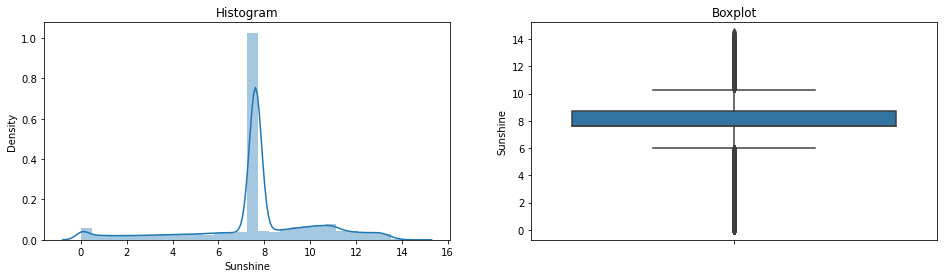

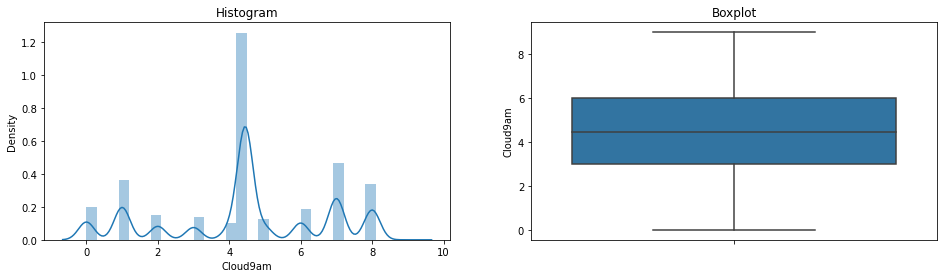

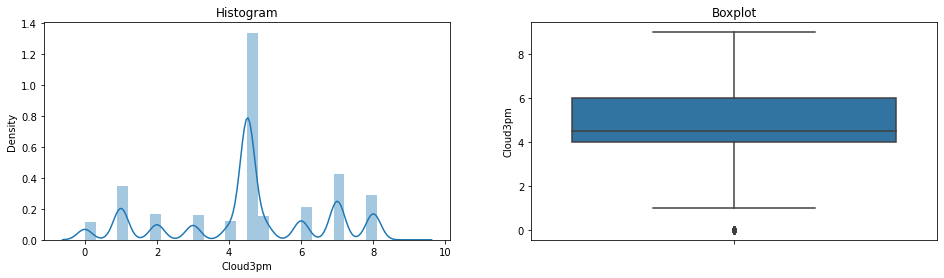

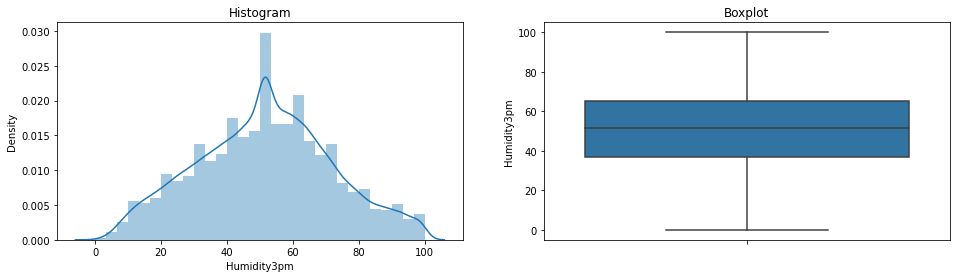

In [107]:
def diagnostic_plots(df_train, variables):
    # Define Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df_train[variables], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variables])
    plt.title('Boxplot')

    plt.show

# Cek Outlier pada kolom 

diagnostic_plots(df_train, 'Sunshine')
diagnostic_plots(df_train, 'Cloud9am')
diagnostic_plots(df_train, 'Cloud3pm')
diagnostic_plots(df_train, 'Humidity3pm')

Karena distribusi dari kolom tersebut skewed, maka akan dilakukan outlier handling menggunakan **IQR**.

In [108]:
def find_skewed_boundaries(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)

    return lower_bound, upper_bound


In [109]:
print(find_skewed_boundaries(df_train, 'Sunshine'))
print(find_skewed_boundaries(df_train, 'Cloud3pm'))

(5.984598804175404, 10.329240717494757)
(1.0, 9.0)


In [110]:
s_lower_boundary, s_upper_boundary = find_skewed_boundaries(df_train, 'Sunshine')
c_lower_boundary, c_upper_boundary = find_skewed_boundaries(df_train, 'Cloud3pm')

In [111]:
print(f'Number of outliers (Sunshine): {len(df_train[(df_train.Sunshine < s_lower_boundary) | (df_train.Sunshine > s_upper_boundary)])}')
print(f'Number of outliers (Cloud3pm): {len(df_train[(df_train.Cloud3pm < c_lower_boundary) | (df_train.Cloud3pm > c_upper_boundary)])}')

Number of outliers (Sunshine): 35754
Number of outliers (Cloud3pm): 3947


Setelah dilakukan perhitungan batas bawah dan batas atas, ditemukan ada **35754 outlier** untuk kolom `Sunshine` dan **3947 outlier** untuk kolom `Cloud3pm` pada `df_train`.

Menghilangkan outlier dari `df_train`.

In [112]:
df_train = df_train[(df_train.Sunshine > s_lower_boundary) & (df_train.Sunshine < s_upper_boundary)]
df_train = df_train[(df_train.Cloud3pm > c_lower_boundary) & (df_train.Cloud3pm < c_upper_boundary)]

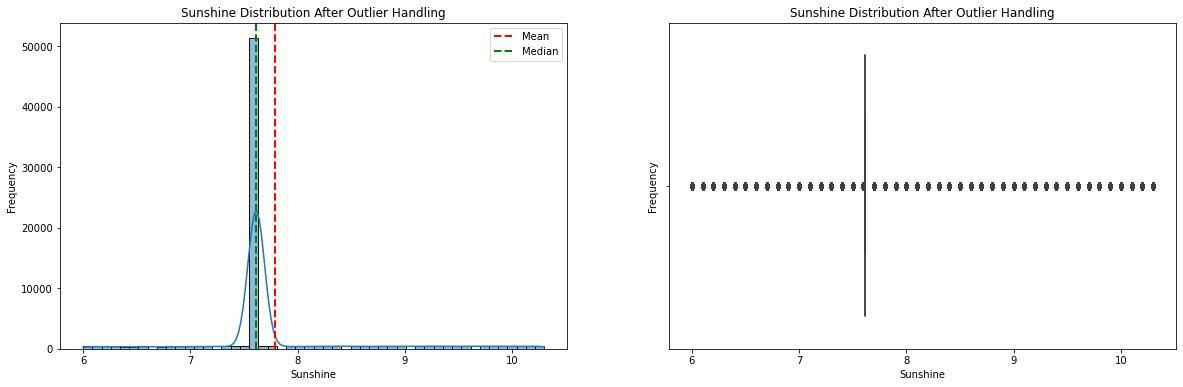

In [113]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Sunshine', data=df_train, bins=50, kde=True)
plt.axvline(df_train.Sunshine.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.Sunshine.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Sunshine Distribution After Outlier Handling')
plt.xlabel('Sunshine')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Sunshine', data=df_train)
plt.title('Sunshine Distribution After Outlier Handling')
plt.xlabel('Sunshine')
plt.ylabel('Frequency')
plt.show()

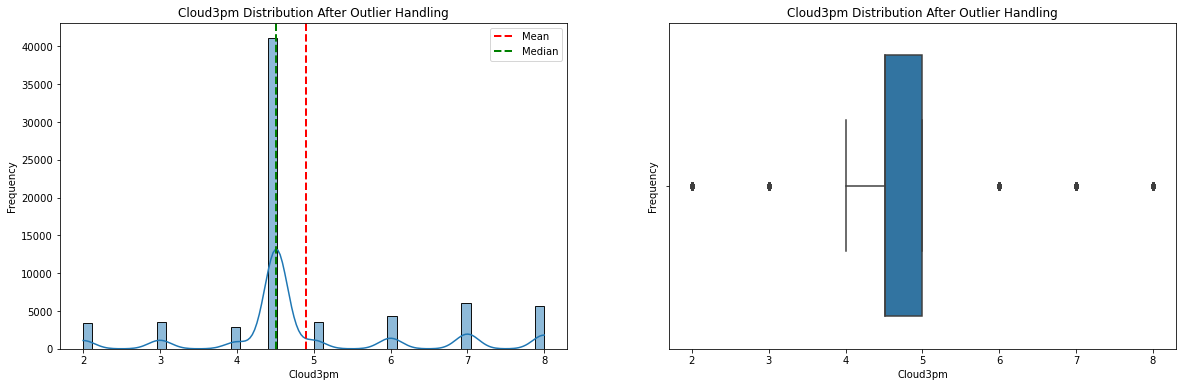

In [114]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Cloud3pm', data=df_train, bins=50, kde=True)
plt.axvline(df_train.Cloud3pm.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.Cloud3pm.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Cloud3pm Distribution After Outlier Handling')
plt.xlabel('Cloud3pm')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Cloud3pm', data=df_train)
plt.title('Cloud3pm Distribution After Outlier Handling')
plt.xlabel('Cloud3pm')
plt.ylabel('Frequency')
plt.show()

In [115]:
df_train.shape

(70410, 23)

Setelah dilakukan penghapusan outlier jumlah baris dari dataframe `df_train` menjadi **70420 baris**.

## V.V. Feature Selection
Personal judgement : Diketahui bahwa beberapa parameter yang paling memengaruhi kolom `RainTomorrow` adalah `Sunshine`, `Cloud9am`, `Cloud3pm`, `Humidity3pm`, dan `RainToday`.

In [116]:
X_train = df_train[['Sunshine', 'Cloud9am', 'Cloud3pm', 'Humidity3pm', 'RainToday']] # Features
y_train = df_train.RainTomorrow # Target

X_test = df_test[['Sunshine', 'Cloud9am', 'Cloud3pm', 'Humidity3pm', 'RainToday']] # Features
y_test = df_test.RainTomorrow # Target

### V.VI. Splitting Columns (Numerical Columns and Categorical Columns)

Selanjutnya akan memisahkan kolom yang bertipe numeric dengan categorical pada `X_train` dan `X_test` untuk memudahkan proses **Scaling** dan **Encoding**.

In [117]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 4
Numerical columns: Index(['Sunshine', 'Cloud9am', 'Cloud3pm', 'Humidity3pm'], dtype='object')
Number of categorical columns: 1
Categorical columns: Index(['RainToday'], dtype='object')


In [118]:
# Feature Scaling

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.37531152, 0.4941784 , 0.41866165, 0.18      ],
       [0.37531152, 0.4941784 , 1.        , 0.52      ],
       [0.37531152, 0.4941784 , 0.41866165, 0.74      ],
       ...,
       [0.37531152, 0.4941784 , 0.41866165, 0.8       ],
       [0.37531152, 0.44444444, 0.41866165, 0.47      ],
       [0.13953488, 0.55555556, 0.16666667, 0.45      ]])

Mengubah `X_train_num_scaled` dan `X_test_num_scaled` menjadi **dataframe**, sekaligus menampilkan `X_train_num_scaled` setelah dilakukan normalisasi (**Scaling**).

In [119]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

X_train_num_scaled.head()

,Sunshine,Cloud9am,Cloud3pm,Humidity3pm
0,0.375312,0.494178,0.418662,0.18
1,0.375312,0.494178,1.000000,0.52
2,0.375312,0.494178,0.418662,0.74
3,0.375312,0.494178,0.418662,0.38
4,0.488372,0.555556,0.666667,0.88


`X_test_num_scaled` setelah dilakukan normalisasi (**Scaling**).

In [120]:
X_test_num_scaled.head()

,Sunshine,Cloud9am,Cloud3pm,Humidity3pm
0,0.377003,0.493491,1.000000,0.75
1,0.377003,0.000000,-0.333333,0.09
2,-0.232558,0.493491,0.417999,0.52
3,0.883721,0.000000,-0.166667,0.33
4,-0.953488,0.777778,0.666667,0.55


In [121]:
# Feature Encoding

encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

<70410x2 sparse matrix of type '<class 'numpy.float64'>'
	with 70410 stored elements in Compressed Sparse Row format>

Mengubah `X_train_cat_encoded` dan `X_test_cat_encoded` menjadi **dataframe**, sekaligus menampilkan `X_train_cat_encoded` setelah dilakukan encoding (**Encoding**).

In [122]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

X_train_cat_encoded.head()

,RainToday_No,RainToday_Yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


`X_test_cat_encoded` setelah dilakukan **encoding**.

In [123]:
X_test_cat_encoded.head()

,RainToday_No,RainToday_Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


### V.VII. Concatenate between Numerical Columns and Categorical Columns

Setelah feature numerik dan kategori dipisah untuk dilakukan **Scaling** dan **Encoding**, pada bagian ini akan menggabungkan kembali feature menjadi `X_train` dan `X_test`.

In [124]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train.head()

,Sunshine,Cloud9am,Cloud3pm,Humidity3pm,RainToday_No,RainToday_Yes
0,0.375312,0.494178,0.418662,0.18,1.0,0.0
1,0.375312,0.494178,1.000000,0.52,1.0,0.0
2,0.375312,0.494178,0.418662,0.74,0.0,1.0
3,0.375312,0.494178,0.418662,0.38,1.0,0.0
4,0.488372,0.555556,0.666667,0.88,1.0,0.0


In [125]:
X_test.head()

,Sunshine,Cloud9am,Cloud3pm,Humidity3pm,RainToday_No,RainToday_Yes
0,0.377003,0.493491,1.000000,0.75,1.0,0.0
1,0.377003,0.000000,-0.333333,0.09,1.0,0.0
2,-0.232558,0.493491,0.417999,0.52,1.0,0.0
3,0.883721,0.000000,-0.166667,0.33,1.0,0.0
4,-0.953488,0.777778,0.666667,0.55,1.0,0.0


# VI. Model Definition
> Akan dibuat **2 model**, dimana:
- `model_logreg` untuk **Logistic Regression**.
- `model_svc` untuk **SVC**.

In [126]:
model_logreg = LogisticRegression()
model_svc = SVC()

# VII. Model Training
> Seteah model dibuat, selanjutnya setiap model akan dilatih menggunakan data trainnya masing-masing.

In [127]:
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [128]:
model_svc.fit(X_train, y_train)

SVC()

# VIII. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

In [129]:
y_pred_train_log = model_logreg.predict(X_train)
y_pred_test_log = model_logreg.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_log)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_log)}')

Accuracy on training set: 0.8171282488282914
Accuracy on test set: 0.8287401574803149


In [130]:
y_pred_train_svc = model_svc.predict(X_train)
y_pred_test_svc = model_svc.predict(X_test)

print(f'Accuracy on training set: {accuracy_score(y_train, y_pred_train_svc)}')
print(f'Accuracy on test set: {accuracy_score(y_test, y_pred_test_svc)}')

Accuracy on training set: 0.8170430336599914
Accuracy on test set: 0.8180188413948256


In [131]:
print('----Train Set----')
print(classification_report(y_train, model_logreg.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_logreg.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     54741
         1.0       0.69      0.33      0.44     15669

    accuracy                           0.82     70410
   macro avg       0.76      0.64      0.67     70410
weighted avg       0.80      0.82      0.79     70410

----Test Set----
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89     22149
         1.0       0.67      0.46      0.54      6299

    accuracy                           0.83     28448
   macro avg       0.76      0.70      0.72     28448
weighted avg       0.82      0.83      0.82     28448



Model logistic regression ini menghasilkan akurasi yang cukup tinggi, baik pada training setnya atau pada testing setnya. Namun perlu dilihat f1-score dari 1.0 ini sangat kecil, ini terjadi karena pada data logistic regression ini terdapat **label imbalance** dimana **label 0 lebih banyak dari label 1**.

In [132]:
print('----Train Set----')
print(classification_report(y_train, model_svc.predict(X_train)))
print('----Test Set----')
print(classification_report(y_test, model_svc.predict(X_test)))

----Train Set----
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     54741
         1.0       0.75      0.27      0.39     15669

    accuracy                           0.82     70410
   macro avg       0.79      0.62      0.64     70410
weighted avg       0.81      0.82      0.78     70410

----Test Set----
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     22149
         1.0       0.76      0.26      0.39      6299

    accuracy                           0.82     28448
   macro avg       0.79      0.62      0.64     28448
weighted avg       0.81      0.82      0.78     28448



Model SVC menghasilkan akurasi yang cukup tinggi, baik pada training setnya atau pada testing setnya. Namun perlu dilihat f1-score dari 1.0 ini sangat kecil, ini terjadi karena pada data SVC ini terdapat **label imbalance** dimana **label 0 lebih banyak dari label 1**.

Berikut merupakan nilai pada intercepat dan coef.

In [133]:
print('Intercept LogReg: ', model_logreg.intercept_)
print('Coefficient LogReg: ', model_logreg.coef_)

Intercept LogReg:  [-4.10459055]
Coefficient LogReg:  [[-0.57663306  0.05896327  0.83466166  4.85385232 -0.40235554  0.40153771]]


# IX. Model Inference
> Pada bagian ini tiap model akan diuji dengan menggunakan **10 data inference** yang sudah dipisahkan dari data training dan testing.

In [134]:
df_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,5/24/2016,NorfolkIsland,15.9,21.9,0.6,4.6,7.621114,W,54.0,W,...,61.0,75.0,1013.6,1010.4,61.0,75.0,20.9,20.3,No,1.0
1,11/24/2015,Woomera,14.2,34.4,0.0,9.4,7.621114,NNW,37.0,ESE,...,38.0,9.0,1017.9,1013.3,38.0,9.0,21.8,32.3,No,0.0
2,7/31/2008,Adelaide,7.6,19.3,0.8,1.8,5.000000,W,69.0,NNE,...,56.0,52.0,1006.8,1005.2,56.0,52.0,14.4,18.1,No,1.0
3,6/7/2016,Brisbane,10.4,22.4,0.0,3.2,9.800000,W,35.0,WNW,...,50.0,33.0,1012.5,1008.7,50.0,33.0,17.3,22.0,No,0.0
4,7/27/2016,Watsonia,7.1,12.1,0.6,2.0,1.900000,W,41.0,WSW,...,100.0,55.0,1012.7,1017.4,100.0,55.0,9.3,11.7,No,0.0
5,1/6/2012,Melbourne,13.8,24.4,0.0,6.6,10.800000,SSW,43.0,SE,...,50.0,41.0,1018.9,1014.6,50.0,41.0,17.7,23.7,No,0.0
6,11/12/2009,PearceRAAF,19.7,30.7,1.4,4.8,3.600000,ESE,44.0,S,...,79.0,47.0,1013.8,1008.0,79.0,47.0,21.8,29.5,Yes,1.0
7,5/20/2009,Canberra,7.2,16.1,0.0,2.0,2.600000,E,35.0,SSE,...,74.0,56.0,1025.1,1023.2,74.0,56.0,11.8,15.2,No,0.0
8,5/4/2013,GoldCoast,14.3,27.9,0.0,4.8,7.621114,NW,37.0,NW,...,61.0,33.0,1020.9,1015.6,61.0,33.0,20.2,27.8,No,0.0
9,6/30/2016,Woomera,6.7,18.3,0.0,4.4,7.621114,WSW,50.0,WNW,...,69.0,37.0,1019.5,1018.0,69.0,37.0,11.0,18.1,No,0.0


## IX.I Inference Preprocessing

In [135]:
# Split Numerical and Categorical Columns

df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

# Feature Scaling and Feature Encoding

df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_encoded = encoder.transform(df_inf_cat)

# Concatenation

df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded.toarray()], axis=1)
df_inf_final

array([[ 0.37700331,  6.77777778, 12.16666667,  0.75      ,  1.        ,
         0.        ],
       [ 0.37700331,  4.22222222,  1.16666667,  0.09      ,  1.        ,
         0.        ],
       [-0.23255814,  6.22222222,  8.33333333,  0.52      ,  1.        ,
         0.        ],
       [ 0.88372093,  5.55555556,  5.16666667,  0.33      ,  1.        ,
         0.        ],
       [-0.95348837, 11.11111111,  8.83333333,  0.55      ,  1.        ,
         0.        ],
       [ 1.11627907,  5.55555556,  6.5       ,  0.41      ,  1.        ,
         0.        ],
       [-0.55813953,  8.77777778,  7.5       ,  0.47      ,  0.        ,
         1.        ],
       [-0.79069767,  8.22222222,  9.        ,  0.56      ,  1.        ,
         0.        ],
       [ 0.37700331,  6.77777778,  5.16666667,  0.33      ,  1.        ,
         0.        ],
       [ 0.37700331,  7.66666667,  5.83333333,  0.37      ,  1.        ,
         0.        ]])

## IX.II. Prediction

In [136]:
y_pred_inf_log = model_logreg.predict(df_inf_final)
y_pred_inf_log = pd.DataFrame(y_pred_inf_log, columns=['Rain Tomorrow Prediction'])
y_pred_inf_log

,Rain Tomorrow Prediction
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [137]:
y_pred_inf_svc = model_svc.predict(df_inf_final)
y_pred_inf_svc = pd.DataFrame(y_pred_inf_svc, columns=['Rain Tomorrow Prediction'])
y_pred_inf_svc

,Rain Tomorrow Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [138]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf_log], axis=1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain Tomorrow Prediction
0,5/24/2016,NorfolkIsland,15.9,21.9,0.6,4.6,7.621114,W,54.0,W,...,75.0,1013.6,1010.4,61.0,75.0,20.9,20.3,No,1.0,1.0
1,11/24/2015,Woomera,14.2,34.4,0.0,9.4,7.621114,NNW,37.0,ESE,...,9.0,1017.9,1013.3,38.0,9.0,21.8,32.3,No,0.0,0.0
2,7/31/2008,Adelaide,7.6,19.3,0.8,1.8,5.000000,W,69.0,NNE,...,52.0,1006.8,1005.2,56.0,52.0,14.4,18.1,No,1.0,1.0
3,6/7/2016,Brisbane,10.4,22.4,0.0,3.2,9.800000,W,35.0,WNW,...,33.0,1012.5,1008.7,50.0,33.0,17.3,22.0,No,0.0,1.0
4,7/27/2016,Watsonia,7.1,12.1,0.6,2.0,1.900000,W,41.0,WSW,...,55.0,1012.7,1017.4,100.0,55.0,9.3,11.7,No,0.0,1.0
5,1/6/2012,Melbourne,13.8,24.4,0.0,6.6,10.800000,SSW,43.0,SE,...,41.0,1018.9,1014.6,50.0,41.0,17.7,23.7,No,0.0,1.0
6,11/12/2009,PearceRAAF,19.7,30.7,1.4,4.8,3.600000,ESE,44.0,S,...,47.0,1013.8,1008.0,79.0,47.0,21.8,29.5,Yes,1.0,1.0
7,5/20/2009,Canberra,7.2,16.1,0.0,2.0,2.600000,E,35.0,SSE,...,56.0,1025.1,1023.2,74.0,56.0,11.8,15.2,No,0.0,1.0
8,5/4/2013,GoldCoast,14.3,27.9,0.0,4.8,7.621114,NW,37.0,NW,...,33.0,1020.9,1015.6,61.0,33.0,20.2,27.8,No,0.0,1.0
9,6/30/2016,Woomera,6.7,18.3,0.0,4.4,7.621114,WSW,50.0,WNW,...,37.0,1019.5,1018.0,69.0,37.0,11.0,18.1,No,0.0,1.0


In [139]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf_svc], axis=1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain Tomorrow Prediction
0,5/24/2016,NorfolkIsland,15.9,21.9,0.6,4.6,7.621114,W,54.0,W,...,75.0,1013.6,1010.4,61.0,75.0,20.9,20.3,No,1.0,0.0
1,11/24/2015,Woomera,14.2,34.4,0.0,9.4,7.621114,NNW,37.0,ESE,...,9.0,1017.9,1013.3,38.0,9.0,21.8,32.3,No,0.0,0.0
2,7/31/2008,Adelaide,7.6,19.3,0.8,1.8,5.000000,W,69.0,NNE,...,52.0,1006.8,1005.2,56.0,52.0,14.4,18.1,No,1.0,0.0
3,6/7/2016,Brisbane,10.4,22.4,0.0,3.2,9.800000,W,35.0,WNW,...,33.0,1012.5,1008.7,50.0,33.0,17.3,22.0,No,0.0,0.0
4,7/27/2016,Watsonia,7.1,12.1,0.6,2.0,1.900000,W,41.0,WSW,...,55.0,1012.7,1017.4,100.0,55.0,9.3,11.7,No,0.0,0.0
5,1/6/2012,Melbourne,13.8,24.4,0.0,6.6,10.800000,SSW,43.0,SE,...,41.0,1018.9,1014.6,50.0,41.0,17.7,23.7,No,0.0,0.0
6,11/12/2009,PearceRAAF,19.7,30.7,1.4,4.8,3.600000,ESE,44.0,S,...,47.0,1013.8,1008.0,79.0,47.0,21.8,29.5,Yes,1.0,0.0
7,5/20/2009,Canberra,7.2,16.1,0.0,2.0,2.600000,E,35.0,SSE,...,56.0,1025.1,1023.2,74.0,56.0,11.8,15.2,No,0.0,0.0
8,5/4/2013,GoldCoast,14.3,27.9,0.0,4.8,7.621114,NW,37.0,NW,...,33.0,1020.9,1015.6,61.0,33.0,20.2,27.8,No,0.0,0.0
9,6/30/2016,Woomera,6.7,18.3,0.0,4.4,7.621114,WSW,50.0,WNW,...,37.0,1019.5,1018.0,69.0,37.0,11.0,18.1,No,0.0,0.0


In [140]:
print(classification_report(df_inf['RainTomorrow'], y_pred_inf_log))

              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25         7
         1.0       0.33      1.00      0.50         3

    accuracy                           0.40        10
   macro avg       0.67      0.57      0.38        10
weighted avg       0.80      0.40      0.33        10



In [141]:
print(classification_report(df_inf['RainTomorrow'], y_pred_inf_svc))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82         7
         1.0       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# X. Pengambilan Kesimpulan

Dataset yang digunkan berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. `RainTomorrow` adalah variabel target untuk diprediksi. Diketahui dari EDA, kolom `Sunshine`, `Cloud9am`, `Cloud3pm`, `Humidity3pm`, dan `RainToday` memiliki korelasi terbesar dengan kolom target atau `RainTomorrow`, maka kolom-kolom tersebut akan digunakan pada feature selection. Dalam kata lain, tingkat matahari, tingkat awan pada pukul 9 pagi dan 3 sore, tingkat kelembaban pada pukul 3 sore, dan terjadinya hujan pada hari ini, merupakan faktor-faktor yang paling mempengaruhi dalam memprediksikan terjadinya hujan atau tidak pada hari esok. Dalam kolom `RainToday` maupun `RainTomorrow` dinyatakan bahwa lebih sering dinyatakan tidak ada hujan daripada ada hujan.

Dalam model evaluation, diketahui bahwa model logistic regression dan SVC menghasilkan akurasi yang cukup tinggi, baik pada training setnya atau pada testing setnya. Namun perlu dilihat f1-score dari 1.0 ini sangat kecil, ini terjadi karena pada data logistic regression ini terdapat **label imbalance** dimana **label 0 lebih banyak dari label 1**. 

Dalam model inference, diketahui bahwa model logistic regression menghasilkan akurasi lebih rendah dibandingkan dengan SVC, dimana model tersebut menghasilkan akurasi yang cukup tinggi. Dapat dilihat dalam model logistic f1-score dari 1.0 ini lebih besar dibandingkan dengan f1-score dari 0.0, dimana model SVC f1-score dari 0.0 memiliki nilai tinggi namun f1-score dari 1.0 memiliki nilai 0/kosong.